The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence, if it is correctly identified!

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987

Bussinness/Social Implication:
Glass Identification is used at the crime scene to evidence in investigations and forensic purpose.
Glass Identification can be used to save cost, time and effort in various industries in  identifying the type of glass beforehand from its components (oxide content).

Data Description:
RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute) 
        1 -- building_windows_float_processed 
        2 --building_windows_non_float_processed 
        3 --vehicle_windows_float_processed 
        4 --vehicle_windows_non_float_processed (none in this database) 
        5 --containers 
        6 --tableware 
        7 --headlamps

Project Objective : Understand the Dataset & cleanup (if required).
Build classification models to predict predict  the type of glass  considering Components such as Magnesium, Aluminium, Silicon, Potassium, Calcium, Barium and Iron.
Also fine-tune the hyperparameters & compare the evaluation metrics of various algorithms models, choose the best model with highest accuracy.

Steps to Follow for the Project: The dataset contains 10 features and 214 samples
Below are the steps to follow for the project:

1 :Importing required Libariries
2: Importing the Dataset 
3: Data Cleaning and transforming
4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship
5: Feature Selection/Extraction- to identify the most relevant features
6: Data Preprocessing
7: Predictive Modelling using various algorithms
8: Comparing the models and Model Evaluation
9: Project Outcomes & Conclusion

# Importing Required Dataset

In [302]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

# 2: Importing the Dataset downlaoded from kaggle

In [303]:
# Importing the dataset downloaded from kaggle
glass_data=pd.read_csv('glass.csv')
glass_data.head(20)  # displaying first 20 records from the dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# 3: Data Cleaning and Transfroming

In [304]:
glass_data.shape # to determine the dimension of the dataset

(214, 10)

In [305]:
glass_data.info() # to display all the information about respective features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


All the features are numerical 

In [306]:
# Checking for missing values
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

We can infer that there is no missing values and the dataset is appropriate for the prediction

In [307]:
glass_data[glass_data.duplicated()]  # Checking for duplicate values
glass_data.drop_duplicates(keep='last',inplace=True)  # Droping  duplicate values

In [308]:
glass_data.describe() # Performing Descriptive Statistical Analysis on the  Features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


We can infer from the statistics that there is no missing data since the count of each feature is 213. There seem to be  outliers present as there are much difference in the interquartile ranges, Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms. 

# 4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship

In [309]:
# Univarite Analysis
glass_type = glass_data["Type"].value_counts() # Determine the unique values for glass type

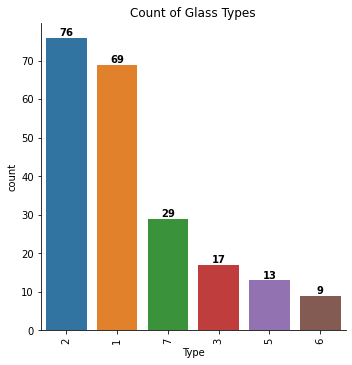

In [310]:
sns.catplot(x = 'Type', data = glass_data , kind = 'count',margin_titles = False,order=glass_type.index) # plotting the quality of wine
#add value labels to the bar chat
for index,value in enumerate(glass_type.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
    plt.xticks(rotation = 90)
    plt.title('Count of Glass Types')

We can infer from the visualization that glass type 1 and 2 have the highest occurences in the dataset and type 5 and 6 have the lowest occurence in the dataset.


In [311]:
# Bivarite Analysis

In [312]:
# Bivarite Analysis
# function to Visualizing Categorical values using Scatter plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['RI', 'Na','Mg','Al','Si','K','Ca','Ba','Fe']
    sns.boxplot(x='Type',y=Categorical_column, data=glass_data)
    plt.title(f"{Categorical_column.title()} vs Type",fontweight="black",size=25,pad=10,)
    col_values = glass_data[Categorical_column].value_counts()
    plt.tight_layout()

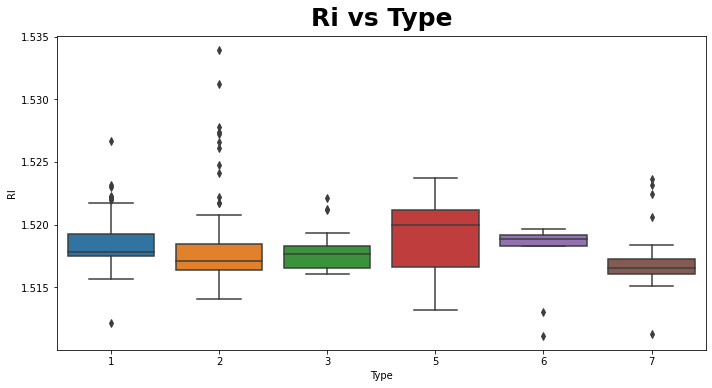

In [313]:
features_plot("RI") # Calling function features_plot to plot Glass type against Refrative Index

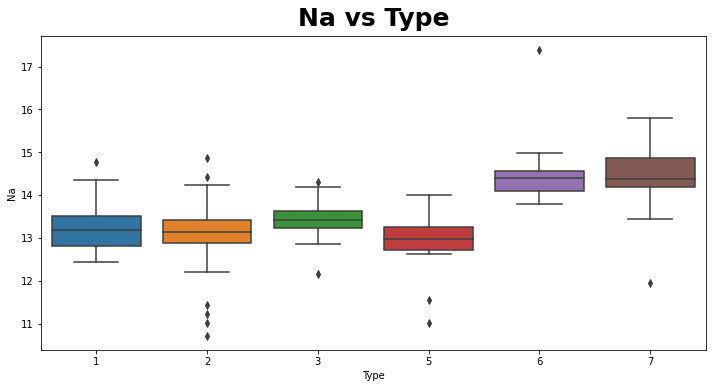

In [314]:
features_plot("Na") # Calling function features_plot to plot Glass type against Sodium quantity

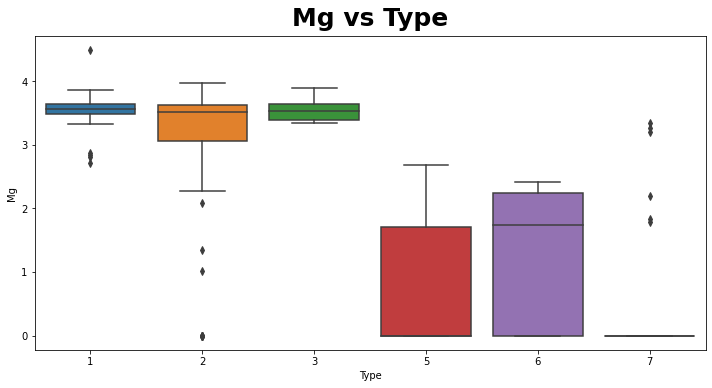

In [315]:
features_plot("Mg") # Calling function features_plot to plot Glass type against Magnessiunm quantity

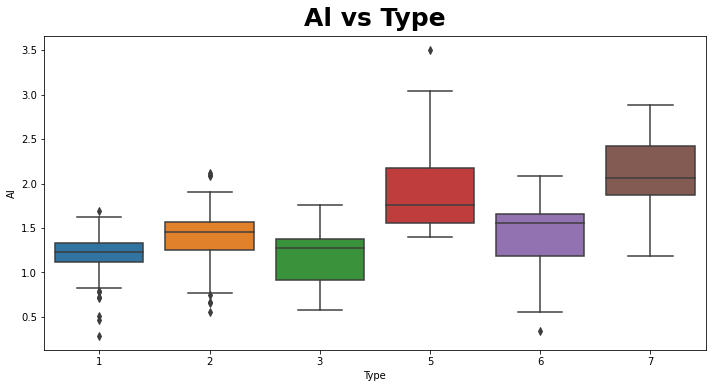

In [316]:
features_plot("Al") # Calling function features_plot to plot Glass type against Aluminium quantity

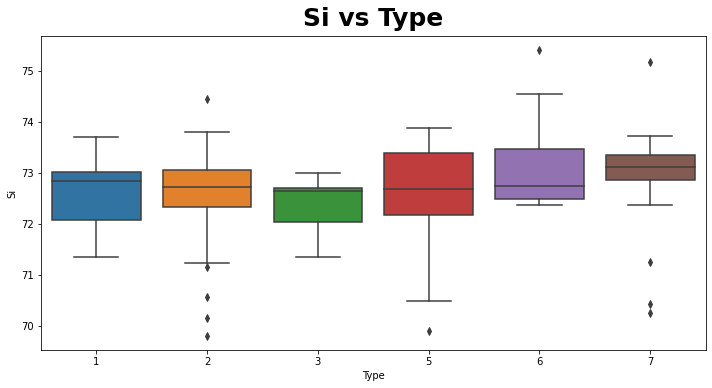

In [317]:
features_plot("Si") # Calling function features_plot to plot Glass type against Si quantity

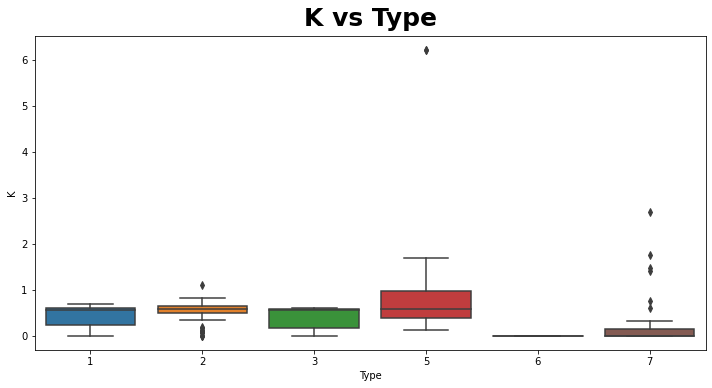

In [318]:
features_plot("K") # Calling function features_plot to plot Glass type against Pottasium quantity

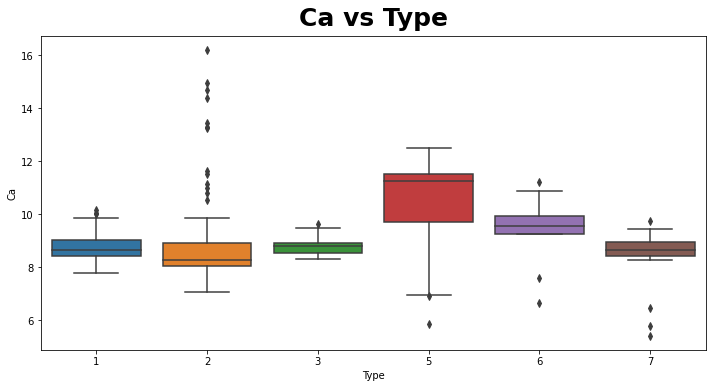

In [319]:
features_plot("Ca") # Calling function features_plot to plot Glass type against Calcium quantity

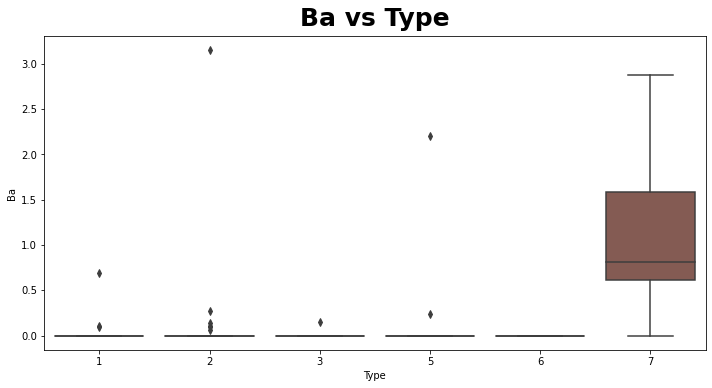

In [320]:
features_plot("Ba") # Calling function features_plot to plot Glass type against Barium quantity

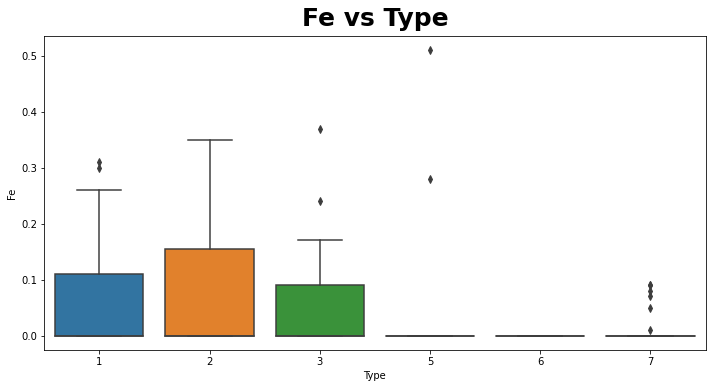

In [321]:
features_plot("Fe") # Calling function features_plot to plot Glass type against Iron quantity

Inference from the Bivarite Analysis:
     Refractive index is similar for all Glass type with glass type 5 with the highest RI value
     Sodium Content is higher in glass type 6 and 7
     Magnessium content is higher in type 5 and 6 and not present in type 7
     Aluminium content is higher in type 5 and 7
     Silica and Pottasium content are  almost the same in all glass type, thus give less information to diffrentiate.
     Calciun content is more in glass type 5
     Barium is present more  in glass type 7
     Iron is present in all the glasses but more in type 1, 2 and 3

In [322]:
# Multivarite Analysis

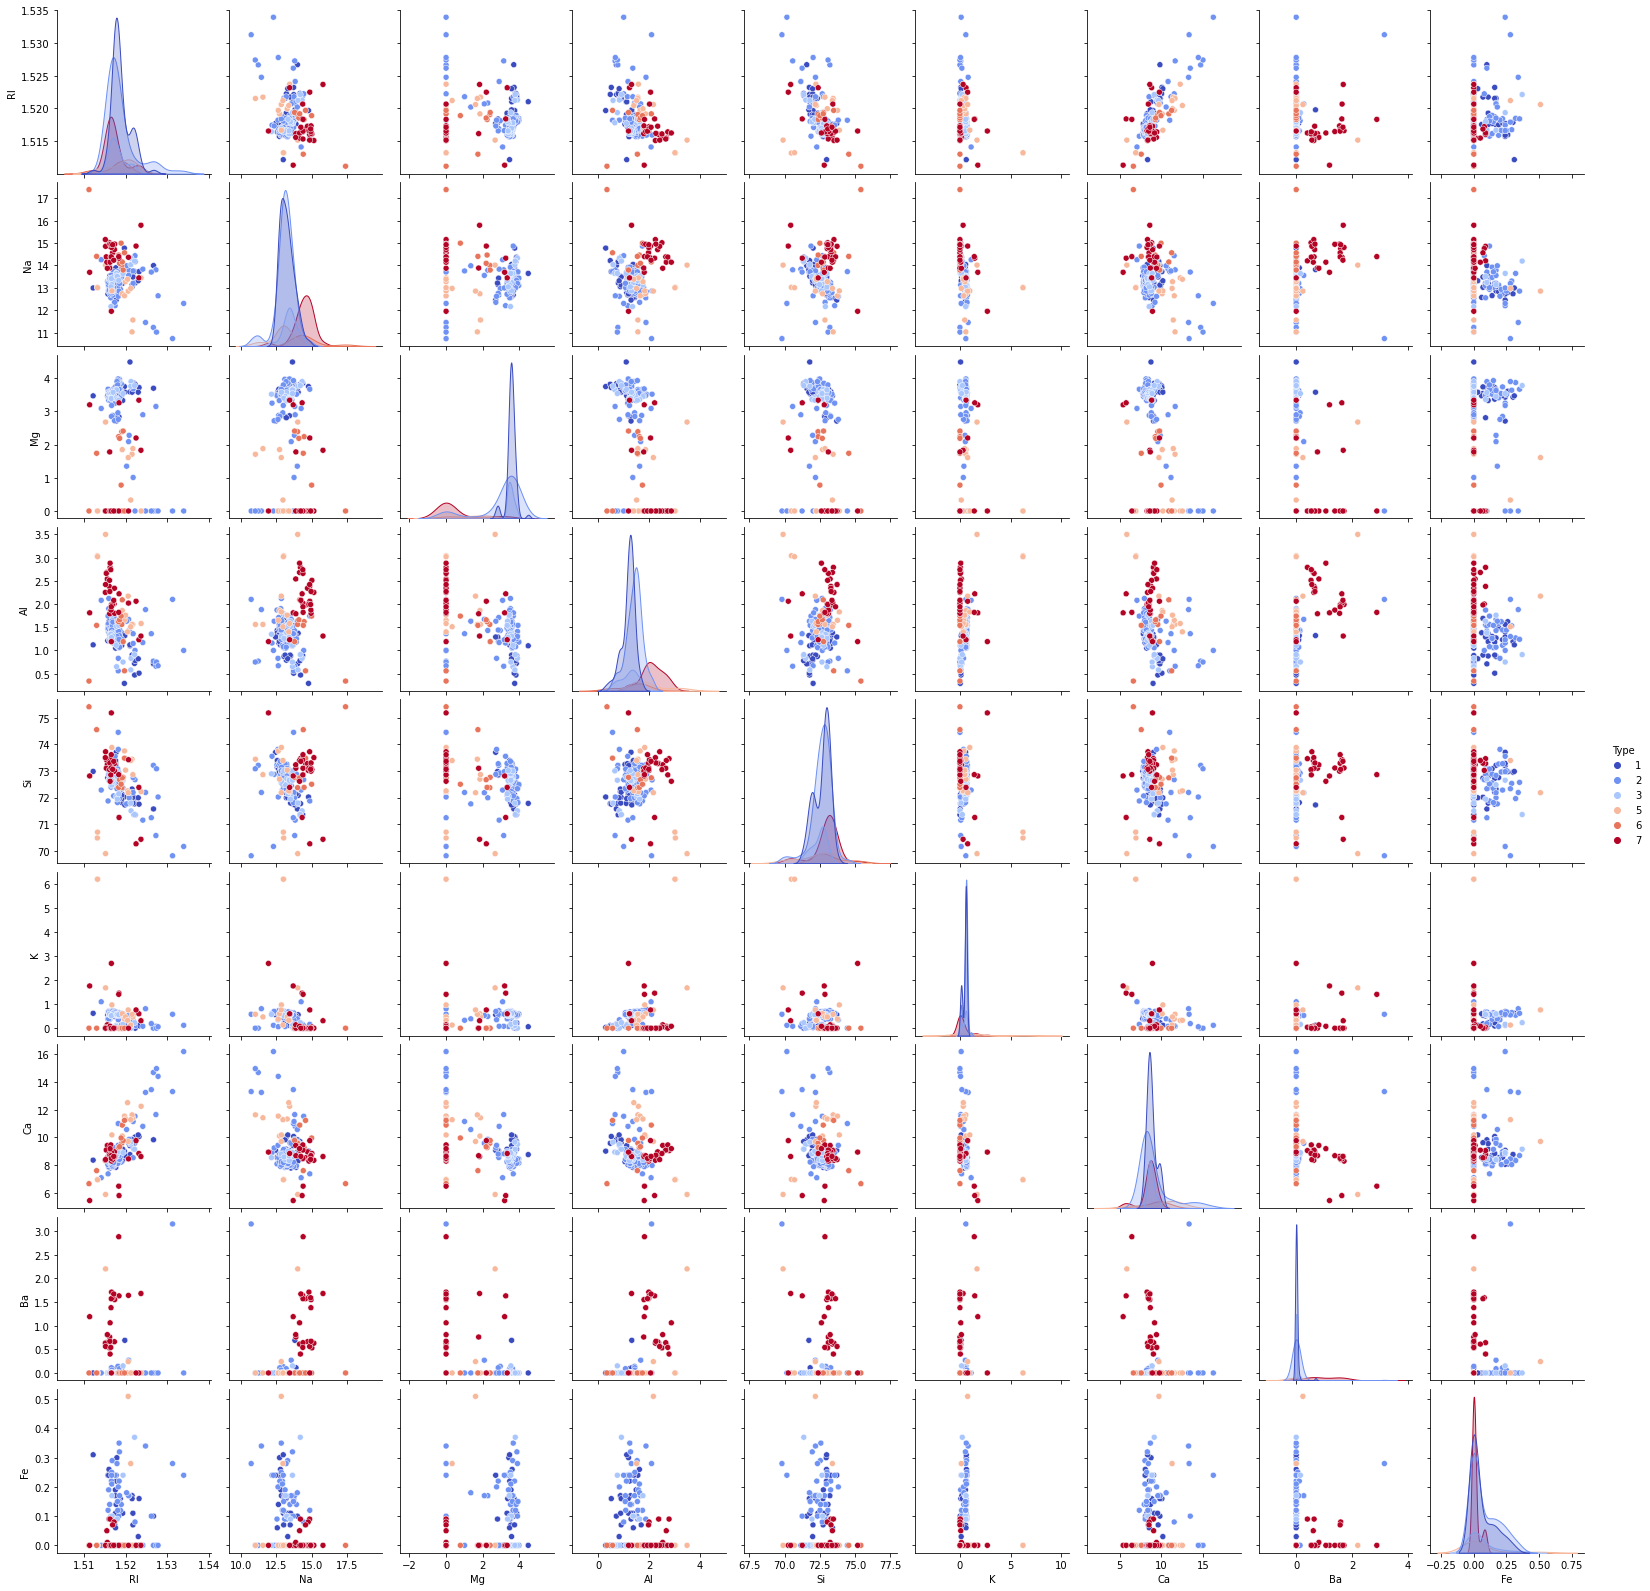

In [323]:
#Pairplot of all numerical variables
sns.pairplot(glass_data, vars=['RI', 'Na','Mg','Al','Si','K','Ca','Ba','Fe'],hue='Type',palette="coolwarm")
plt.show()

# 5: Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

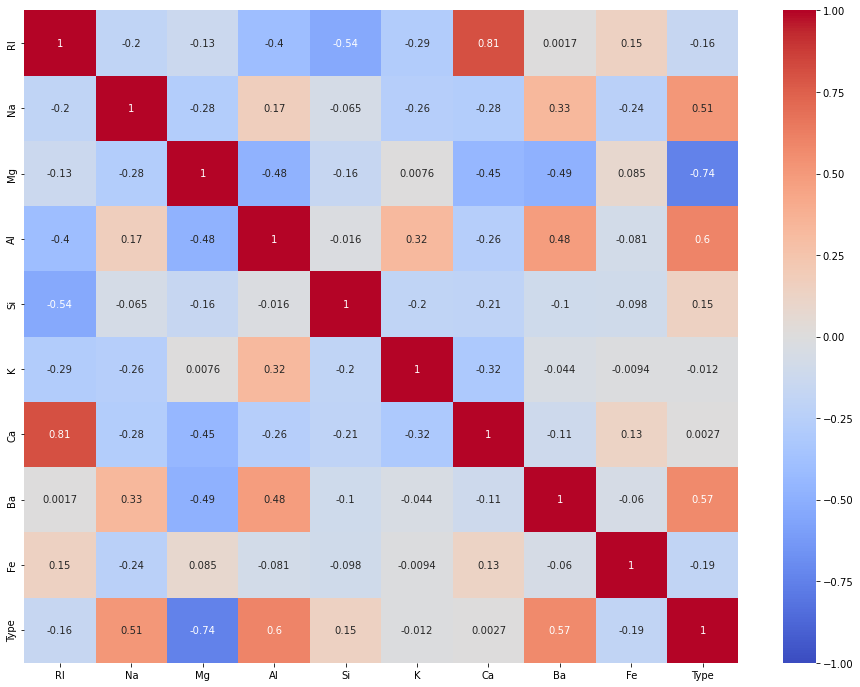

In [324]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(glass_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=glass_data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

There seems to be a strong positive correlation between RI and Ca and also we have fair cotrrelation between Al and Ba, thus we have issue of multiple correlation and can be solved using PCA  (principal component analysis)

# 6: Data Preprocessing

In [325]:
# Separating feature data and Label data
X = glass_data.drop(['Type'],axis=1)
y = glass_data['Type']

In [326]:
from sklearn.preprocessing import StandardScaler # Standardizing the feature data
sc=StandardScaler()
scaledX=sc.fit_transform(X)
scaledX

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [327]:
# PCA 
from sklearn.decomposition import PCA

In [328]:
pca=PCA() # using PCA to remove multicollilinearity
X_new = pca.fit_transform(scaledX)
X_new

array([[ 1.1443623 , -0.52323523, -0.31823286, ..., -0.37793979,
        -0.19630822,  0.01570663],
       [-0.57303251, -0.76210888, -0.52689836, ..., -0.01509085,
        -0.28408806, -0.01110219],
       [-0.933557  , -0.93377298, -0.54140137, ..., -0.36524015,
        -0.09584696,  0.02157711],
       ...,
       [-1.68478227,  3.27092875, -0.94322444, ...,  0.66857718,
        -0.89241756,  0.04632146],
       [-2.37137573,  2.73676478, -1.25525161, ...,  0.67238395,
         0.07432612, -0.02722806],
       [-2.26486625,  3.01102906, -0.90849352, ...,  0.45513871,
         0.06320996, -0.01930659]])

In [329]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.30,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((149, 9), (64, 9), (149,), (64,))

In [330]:
# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# 7: Predictive Modelling using various algorithms

# 7.1 Support Vector Machine Model

In [331]:
# Using Support Vector Machine
svmModel=SVC(kernel='rbf',random_state=1)
svmModel.fit(X_train,y_train)

SVC(random_state=1)

In [332]:
#Predicting the test set result
svmpredict=svmModel.predict(X_test)
svmpredict.shape

(64,)

In [333]:
#Accuracy and various Metrics for the model
svc_testing=round(accuracy_score(y_test, svmpredict)*100,2)
svc_mae=mean_absolute_error(svmpredict,y_test)
svc_mse=mean_squared_error(svmpredict,y_test)
svc_rmse=np.sqrt(mean_squared_error(svmpredict,y_test))
svc_r2=round(r2_score(y_test,svmpredict)* 100,2)
print('Mean absolute error  =>',svc_mae)
print('Mean squared error  =>',svc_mse)
print('Root Mean squared error  =>',svc_rmse)
print('R2 Score  =>',svc_r2)

Mean absolute error  => 0.515625
Mean squared error  => 1.109375
Root Mean squared error  => 1.0532687216470449
R2 Score  => 74.78


In [334]:
# Classification Report
print(classification_report(y_test,svmpredict))

              precision    recall  f1-score   support

           1       0.64      0.76      0.70        21
           2       0.65      0.74      0.69        23
           3       0.00      0.00      0.00         5
           5       1.00      0.25      0.40         4
           6       0.50      0.50      0.50         2
           7       0.90      1.00      0.95         9

    accuracy                           0.69        64
   macro avg       0.62      0.54      0.54        64
weighted avg       0.65      0.69      0.65        64



# 7.2 Logistic Regression Model 

In [335]:
# train a logistic regression model on the training set
glass_lreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
glass_lreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [336]:
# Predicting the data mode
lr_pred = glass_lreg.predict(X_test) # Predicting the model
lr_pred.shape

(64,)

In [337]:
#Accuracy and various Metrics for the model
LR_testing=round(accuracy_score(y_test, lr_pred)*100,2)
LR_mae=mean_absolute_error(lr_pred,y_test)
LR_mse=mean_squared_error(lr_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(lr_pred,y_test))
LR_r2=round(r2_score(y_test,lr_pred)*100,2)
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)

Mean absolute error  => 0.53125
Mean squared error  => 1.25
Root Mean squared error  => 1.118033988749895
R2 Score  => 71.58


In [338]:
# Classification Report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.61      0.67      0.64        21
           2       0.62      0.65      0.64        23
           3       0.00      0.00      0.00         5
           5       1.00      0.75      0.86         4
           6       0.67      1.00      0.80         2
           7       0.90      1.00      0.95         9

    accuracy                           0.67        64
   macro avg       0.63      0.68      0.65        64
weighted avg       0.63      0.67      0.65        64



# 7.3 K-Nearest Neighbor Model

In [339]:
# Instantiate the model with 2 neighbors.
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan') # create instance of K-neighbor classifier
knn_model=knn.fit(X_train,y_train) #  Training the model 

In [340]:
knn_pred=knn.predict(X_test) # predicting using the model
knn_pred.shape

(64,)

In [341]:
#Accuracy and various Metrics for the model
knn_testing=round(accuracy_score(y_test, knn_pred)*100,2)
knn_mae=mean_absolute_error(knn_pred,y_test)
knn_mse=mean_squared_error(knn_pred,y_test)
knn_rmse=np.sqrt(mean_squared_error(knn_pred,y_test))
knn_r2=round(r2_score(y_test,knn_pred)*100,2)
print('Mean absolute error  =>',knn_mae)
print('Mean squared error  =>',knn_mse)
print('Root Mean squared error  =>',knn_rmse)
print('R2 Score  =>',knn_r2)

Mean absolute error  => 0.515625
Mean squared error  => 1.296875
Root Mean squared error  => 1.1388041973930374
R2 Score  => 70.51


In [342]:
# Classification Report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.71      0.81      0.76        21
           2       0.67      0.78      0.72        23
           3       1.00      0.20      0.33         5
           5       0.50      0.25      0.33         4
           6       1.00      0.50      0.67         2
           7       0.89      0.89      0.89         9

    accuracy                           0.72        64
   macro avg       0.79      0.57      0.62        64
weighted avg       0.74      0.72      0.70        64



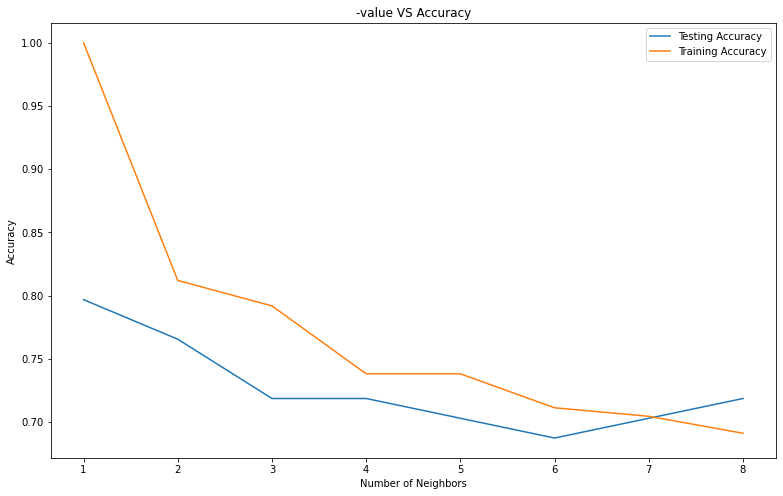

Best accuracy is 0.796875 with K = 1


In [343]:
k_values = np.arange(1,9)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 9(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# 7.4 Decison Tree Classifier Model

In [344]:
# Fit model on the Daatset
DT=tree.DecisionTreeClassifier()

In [345]:
DT.fit(X_train,y_train) # Fit model on the Daatset
DT_pred=DT.predict(X_test) # Predicting the model
DT_pred.shape

(64,)

In [346]:
#Accuracy and various Metrics for the model
DT_testing=round(accuracy_score(y_test, DT_pred)*100,2)
DT_mae=mean_absolute_error(DT_pred,y_test)
DT_mse=mean_squared_error(DT_pred,y_test)
DT_rmse=np.sqrt(mean_squared_error(DT_pred,y_test))
DT_r2=round(r2_score(y_test,DT_pred)*100,2)
print('Mean absolute error  =>',DT_mae)
print('Mean squared error  =>',DT_mse)
print('Root Mean squared error  =>',DT_rmse)
print('R2 Score  =>',DT_r2)

Mean absolute error  => 0.78125
Mean squared error  => 2.65625
Root Mean squared error  => 1.6298006013006623
R2 Score  => 39.61


In [347]:
# Classification Report
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           1       0.68      0.62      0.65        21
           2       0.71      0.65      0.68        23
           3       0.67      0.40      0.50         5
           5       0.67      0.50      0.57         4
           6       0.50      0.50      0.50         2
           7       0.56      1.00      0.72         9

    accuracy                           0.66        64
   macro avg       0.63      0.61      0.60        64
weighted avg       0.67      0.66      0.65        64



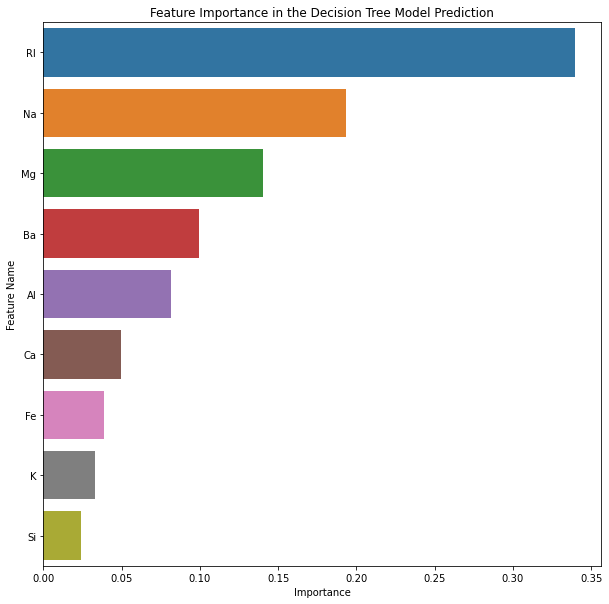

In [348]:
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":DT.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Decision Tree Model Prediction")
plt.yticks(size=10)
plt.show()

# 7.5 Random Forest Classifier

In [349]:
clf = RandomForestClassifier(n_estimators = 80, max_depth = 50 ,max_features = 3, bootstrap = True, random_state = 18)

In [350]:
clf.fit(X_train, y_train) # Fitting the model

RandomForestClassifier(max_depth=50, max_features=3, n_estimators=80,
                       random_state=18)

In [351]:
clf_pred = clf.predict(X_test) # Predicting the model
clf_pred.shape

(64,)

In [352]:
#Accuracy and various Metrics for the model
clf_testing=round(accuracy_score(y_test, clf_pred)*100,2)
clf_mae=mean_absolute_error(clf_pred,y_test)
clf_mse=mean_squared_error(clf_pred,y_test)
clf_rmse=np.sqrt(mean_squared_error(clf_pred,y_test))
clf_r2=round(r2_score(y_test,clf_pred)*100,2)
print('Mean absolute error  =>',clf_mae)
print('Mean squared error  =>',clf_mse)
print('Root Mean squared error  =>',clf_rmse)
print('R2 Score  =>',clf_r2)

Mean absolute error  => 0.515625
Mean squared error  => 1.296875
Root Mean squared error  => 1.1388041973930374
R2 Score  => 70.51


In [353]:
# Classification Report
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           1       0.75      0.71      0.73        21
           2       0.75      0.78      0.77        23
           3       0.50      0.40      0.44         5
           5       1.00      0.25      0.40         4
           6       0.50      0.50      0.50         2
           7       0.69      1.00      0.82         9

    accuracy                           0.72        64
   macro avg       0.70      0.61      0.61        64
weighted avg       0.73      0.72      0.71        64



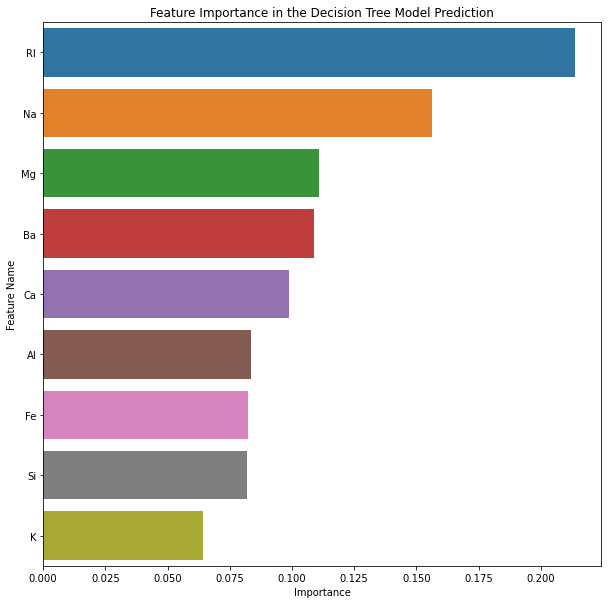

In [354]:
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":clf.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Decision Tree Model Prediction")
plt.yticks(size=10)
plt.show()

# 7.6 Gradientboost Classifier Models

In [355]:
gbc = GradientBoostingClassifier(n_estimators=80,learning_rate=.05,max_depth = 3)

In [356]:
gbc.fit(X_train, y_train) # Fitting the model

GradientBoostingClassifier(learning_rate=0.05, n_estimators=80)

In [357]:
gbc_pred = adc.predict(X_test) # Predicting the model
gbc_pred.shape

(64,)

In [358]:
#Accuracy and various Metrics for the model
#gbc_testing=round(accuracy_score(y_test, gbc_pred)*100,2)
gbc_mae=mean_absolute_error(gbc_pred,y_test)
gbc_mse=mean_squared_error(gbc_pred,y_test)
gbc_rmse=np.sqrt(mean_squared_error(gbc_pred,y_test))
gbc_r2=round(metrics.accuracy_score(gbc_pred, y_test)*100,2)
#gbc1_r2=round(r2_score(y_test,gbc_pred)*100,2)
print('Mean absolute error  =>',gbc_mae)
print('Mean squared error  =>',gbc_mse)
print('Root Mean squared error  =>',gbc_rmse)
print('R2 Score  =>',gbc_r2)
#print('R2 Score  =>',gbc1_r2)

Mean absolute error  => 0.859375
Mean squared error  => 2.296875
Root Mean squared error  => 1.5155444566227676
R2 Score  => 51.56


In [359]:
# Classification Report
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           1       0.75      0.71      0.73        21
           2       0.75      0.78      0.77        23
           3       0.50      0.40      0.44         5
           5       1.00      0.25      0.40         4
           6       0.50      0.50      0.50         2
           7       0.69      1.00      0.82         9

    accuracy                           0.72        64
   macro avg       0.70      0.61      0.61        64
weighted avg       0.73      0.72      0.71        64



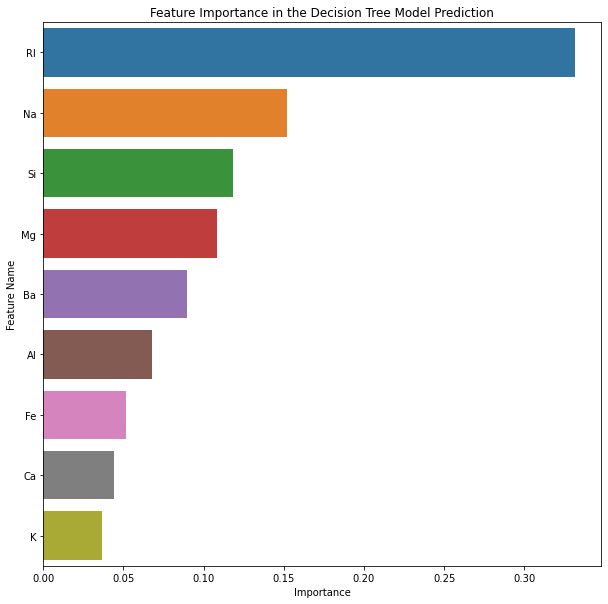

In [360]:
imp_df = pd.DataFrame({"Feature Name":X.columns,"Importance":gbc.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Decision Tree Model Prediction")
plt.yticks(size=10)
plt.show()

# 8: Comparing the models and Model Evaluation

In [361]:
# Results
models_metrics = pd.DataFrame([
    ["Support Vector Machine Model", svc_testing, svc_mse],
    ["Logistic Regression Model",LR_testing, LR_mse],
    ["K-Nearest Neighbor Model", knn_testing, knn_mse],
    ["Decison Tree Classifier Model", DT_testing, DT_mse],
    ["Random Forest Classifier", clf_testing, clf_mse],
    ["Gradientboost Classifier Modelsr", gbc_testing, gbc_mse]
])
models_metrics.columns= ["Model","Accuracy","MSE"]
models_metrics.set_index("Model")
models_metrics

,Model,Accuracy,MSE
0,Support Vector Machine Model,68.75,1.109375
1,Logistic Regression Model,67.19,1.250000
2,K-Nearest Neighbor Model,71.88,1.296875
3,Decison Tree Classifier Model,65.62,2.656250
4,Random Forest Classifier,71.88,1.296875
5,Gradientboost Classifier Modelsr,53.70,2.296875


In [362]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',fontweight="black",fontsize='22')

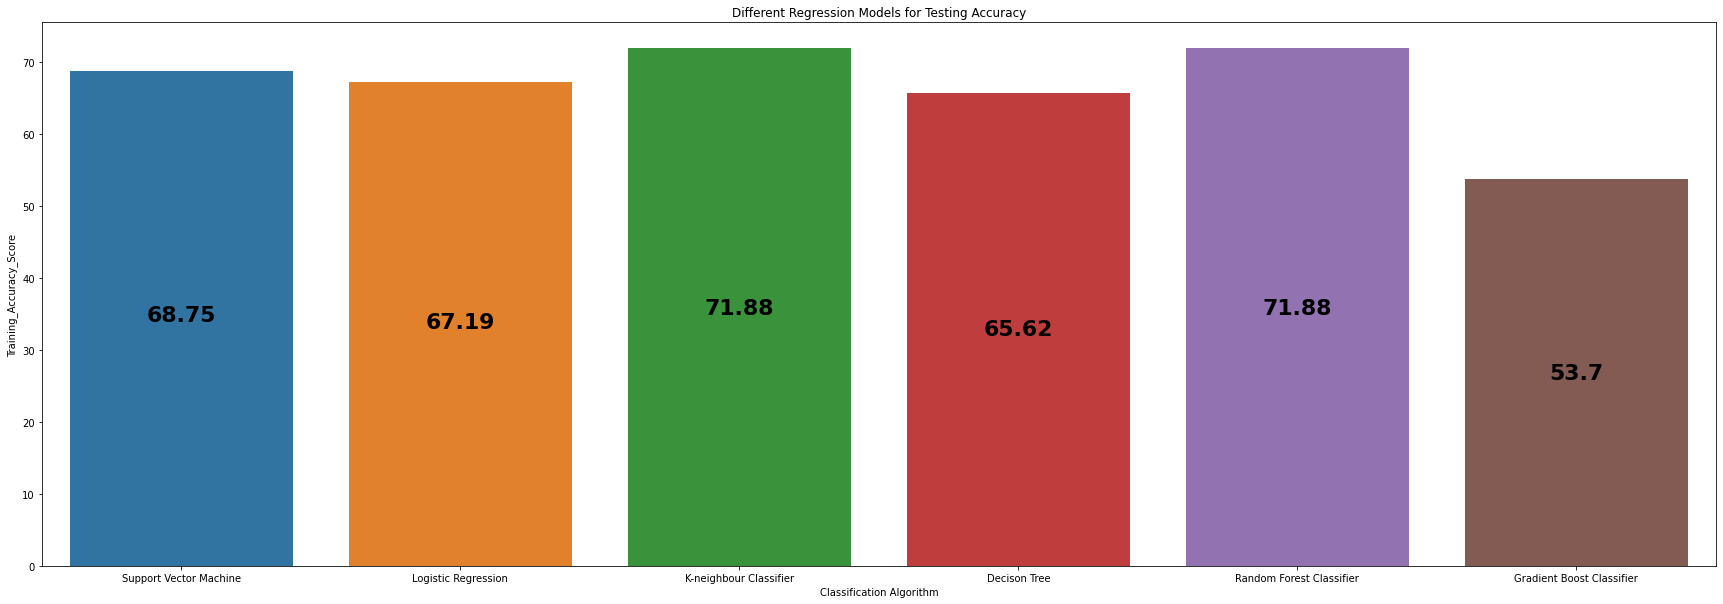

In [363]:
# Creating a bar plot
x= ['Support Vector Machine','Logistic Regression','K-neighbour Classifier','Decison Tree','Random Forest Classifier','Gradient Boost Classifier']
y= [svc_testing,LR_testing,knn_testing,DT_testing,clf_testing,gbc_testing]
plt.figure(figsize = (30,10))
sns.barplot(x,y)

# calling the function to add value labels
addlabels(x, y)

# Add labels to your graph
plt.xlabel('Classification Algorithm')
plt.ylabel('Training_Accuracy_Score')
plt.title("Different Regression Models for Testing Accuracy")

#plt.legend()
plt.show()

Random Forest Classifier gives the highest accuracy and all the features seem to be important from the other models. So, we will retain random Forest Classfier as our final model and perform hyperparameter tuning to improve it.

8.1 Hypertunning the Parameters

In [366]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=7, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [367]:
# Run the final model
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
round(metrics.accuracy_score(y_pred,y_test)*100,2)

71.88

# 9: Project Conclusion

The Exploratory Data and predictive analysis provided valuable insights into the factors that contribute the type of glass. We can infere that there is a strong positive correlations between SRI and Ca. Random Forest Classifier gives the highest accuracy and all the features seem to be important from the other models. 
But all the models fif well to predict the type of glass.